# **Image Clustering using imagebind LLM**

In [1]:

!pip install gdown


In [3]:
!git clone https://github.com/facebookresearch/ImageBind.git

Cloning into 'ImageBind'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 112 (delta 43), reused 33 (delta 33), pack-reused 51
Receiving objects: 100% (112/112), 2.64 MiB | 6.59 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [2]:
!pip install -r ImageBind/requirements.txt

  Using cached pytorchvideo-0.1.5-py3-none-any.whl


In [3]:
%cd ImageBind
%pwd

/content/ImageBind


'/content/ImageBind'

In [4]:
from imagebind import data
import torch
from imagebind.models import imagebind_model
from imagebind.models.imagebind_model import ModalityType

device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = imagebind_model.imagebind_huge(pretrained=True)
model.eval()
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


  0%|          | 0.00/4.47G [00:00<?, ?B/s]

ImageBindModel(
  (modality_preprocessors): ModuleDict(
    (vision): RGBDTPreprocessor(
      (cls_token): tensor((1, 1, 1280), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Sequential(
          (0): PadIm2Video()
          (1): Conv3d(3, 1280, kernel_size=(2, 14, 14), stride=(2, 14, 14), bias=False)
        )
      )
      (pos_embedding_helper): SpatioTemporalPosEmbeddingHelper(
        (pos_embed): tensor((1, 257, 1280), requires_grad=True)
        
      )
    )
    (text): TextPreprocessor(
      (pos_embed): tensor((1, 77, 1024), requires_grad=True)
      (mask): tensor((77, 77), requires_grad=False)
      
      (token_embedding): Embedding(49408, 1024)
    )
    (audio): AudioPreprocessor(
      (cls_token): tensor((1, 1, 768), requires_grad=True)
      
      (rgbt_stem): PatchEmbedGeneric(
        (proj): Conv2d(1, 768, kernel_size=(16, 16), stride=(10, 10), bias=False)
        (norm_layer): LayerNorm((768,), eps=1e-05, elementwise_affine=

In [9]:
import os
from os.path import isfile, join
mypath = "/content/drive/MyDrive/clustering/h_images"
image_paths = [join(mypath, f) for f in os.listdir(mypath) if isfile(join(mypath, f))]
image_paths

['/content/drive/MyDrive/clustering/h_images/999.jpg',
 '/content/drive/MyDrive/clustering/h_images/997.jpg',
 '/content/drive/MyDrive/clustering/h_images/996.jpg',
 '/content/drive/MyDrive/clustering/h_images/993.jpg',
 '/content/drive/MyDrive/clustering/h_images/984.jpg',
 '/content/drive/MyDrive/clustering/h_images/986.jpg',
 '/content/drive/MyDrive/clustering/h_images/987.jpg',
 '/content/drive/MyDrive/clustering/h_images/995.jpg',
 '/content/drive/MyDrive/clustering/h_images/989.jpg',
 '/content/drive/MyDrive/clustering/h_images/990.jpg',
 '/content/drive/MyDrive/clustering/h_images/906.jpg',
 '/content/drive/MyDrive/clustering/h_images/907.jpg',
 '/content/drive/MyDrive/clustering/h_images/910.jpg',
 '/content/drive/MyDrive/clustering/h_images/911.jpg',
 '/content/drive/MyDrive/clustering/h_images/912.jpg',
 '/content/drive/MyDrive/clustering/h_images/902.jpg',
 '/content/drive/MyDrive/clustering/h_images/903.jpg',
 '/content/drive/MyDrive/clustering/h_images/904.jpg',
 '/content

In [10]:
inputs = {
    ModalityType.VISION: data.load_and_transform_vision_data(image_paths, device)
}
with torch.no_grad():
    embeddings = model(inputs)



KeyError: ignored

In [11]:
embeddings

{'vision': tensor([[ 0.0071, -0.0067, -0.0308,  ...,  0.0255, -0.0192, -0.0023],
         [ 0.0058, -0.0194, -0.0365,  ..., -0.0101, -0.0218, -0.0014],
         [ 0.0086, -0.0060, -0.0360,  ...,  0.0024, -0.0088, -0.0216],
         ...,
         [ 0.0112,  0.0140, -0.0129,  ..., -0.0205, -0.0188,  0.0082],
         [ 0.0221,  0.0123, -0.0067,  ..., -0.0518, -0.0331, -0.0267],
         [ 0.0033,  0.0026, -0.0113,  ..., -0.0384, -0.0374, -0.0168]])}

In [12]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings['vision'])
labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0


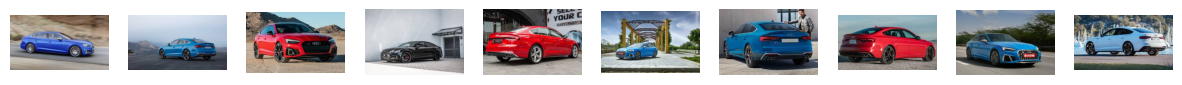

Cluster 1


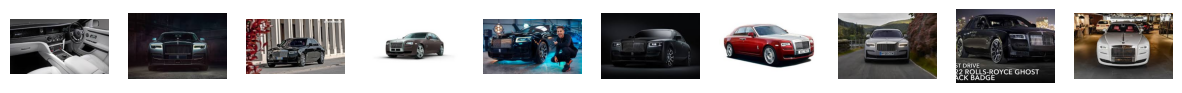

Cluster 2


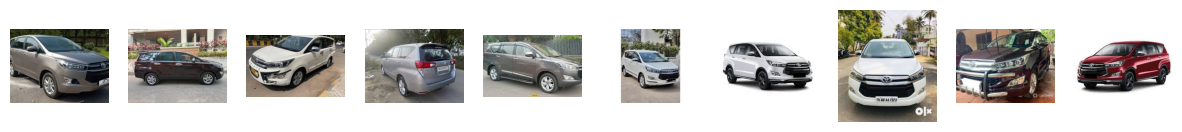

In [16]:
from PIL import Image
def plot_cluster(images, labels, cluster_number):
    cluster_images = [img for img, label in zip(images, labels) if label == cluster_number]
    fig, axs = plt.subplots(1, len(cluster_images), figsize=(15, 3))
    for ax, img in zip(axs, cluster_images):
        ax.imshow(Image.open(img))
        ax.axis('off')
    plt.show()

# Example: Plot clusters
for i in range(3) :
    print("Cluster " + str(i))
    plot_cluster(image_paths, labels, i)
